# Bank Churners

## Credit Card customers
CLIENTNUM : Client number. Unique identifier for the customer holding the account

Attrition_Flag : Internal event (customer activity) variable - if the account is closed then 1 else 0

Customer_Age : Demographic variable - Customer's Age in Years

Gender : Demographic variable - M=Male, F=Female

Dependent_count : Demographic variable - Number of dependents

Education_Level : Demographic variable - Educational Qualification of the account holder (example: high school, 
college graduate, etc.)

Marital_Status : Demographic variable - Married, Single, Divorced, Unknown

Income_Category : Demographic variable - Annual Income Category of the account holder

Card_Category : Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

Months_on_book : Period of relationship with bank

Total_Relationship_Count : Total no. of products held by the customer

Months_Inactive_12_mon : No. of months inactive in the last 12 months

Contacts_Count_12_mon : No. of Contacts in the last 12 months

Credit_Limit ; Credit Limit on the Credit Card

Total_Revolving_Bal : Total Revolving Balance on the Credit Card

Avg_Open_To_Buy : Open to Buy Credit Line (Average of last 12 months)

Total_Amt_Chng_Q4_Q1 : Change in Transaction Amount (Q4 over Q1)

Total_Trans_Amt : Total Transaction Amount (Last 12 months)

Total_Trans_Ct : Total Transaction Count (Last 12 months)

Total_Ct_Chng_Q4_Q1 : Change in Transaction Count (Q4 over Q1)

Avg_Utilization_Ratio : Average Card Utilization Ratio

In [1]:
### Importing the libraries 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler


from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('BankChurners.csv')
data = data.drop(columns = ["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
         "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"])
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
#Inspect the Categorical Vriables

print("Attrition Flag:", data.Attrition_Flag.unique())
print("Gender:", data.Gender.unique())
print("Education Level:", data.Education_Level.unique())
print("Marital Status:", data.Marital_Status.unique())
print("Income Category:", data.Income_Category.unique())
print("Card Category:", data.Card_Category.unique())

Attrition Flag: ['Existing Customer' 'Attrited Customer']
Gender: ['M' 'F']
Education Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital Status: ['Married' 'Single' 'Unknown' 'Divorced']
Income Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card Category: ['Blue' 'Gold' 'Silver' 'Platinum']


#### A visual inspection shows that there are no overlaps in categories, hence, they can be used for our classification without any altercations

_______

## Inspecting the Customer Attrition Split

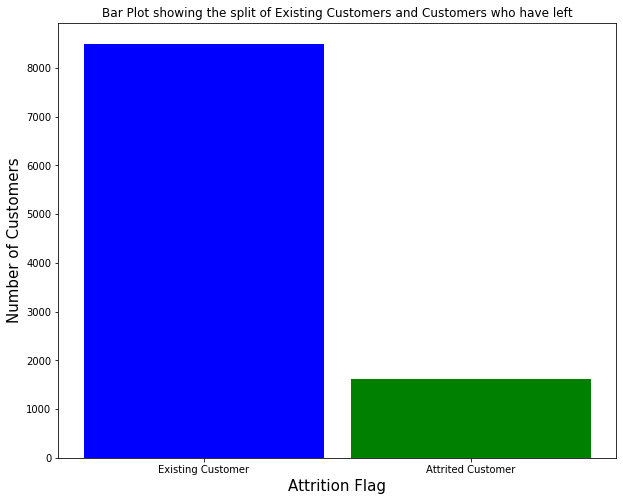

In [5]:
plt.figure(figsize=[10,8])
plt.bar(["Existing Customer", "Attrited Customer"],
        [sum(data.Attrition_Flag == "Existing Customer"), sum(data.Attrition_Flag == "Attrited Customer")],
       color=['blue','green'], width=0.9)
plt.title("Bar Plot showing the split of Existing Customers and Customers who have left")
plt.xlabel("Attrition Flag", size=15)
plt.ylabel("Number of Customers", size=15)
plt.show()

## Encoding Categorical Variables

In [6]:
x = data.iloc[:, 2:]
y = data.iloc[:, 1]

In [7]:
ct =  make_column_transformer((OneHotEncoder(), 
                               ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']),
                              remainder='passthrough')
x = ct.fit_transform(x)

In [8]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,1.0,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,4716.0,0.0,4716.0,2.175,816.0,28.0,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,4003.0,1851.0,2152.0,0.703,15476.0,117.0,0.857,0.462
10123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,3.0,4277.0,2186.0,2091.0,0.804,8764.0,69.0,0.683,0.511
10124,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,4.0,5409.0,0.0,5409.0,0.819,10291.0,60.0,0.818,0.000
10125,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,5281.0,0.0,5281.0,0.535,8395.0,62.0,0.722,0.000


In [9]:
## Label Encodoing the y variable

le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

## Train test split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

8101
2026
8101
2026


## Normalising the data

In [11]:
sc = StandardScaler()
x_train[:, 23:] = sc.fit_transform(x_train[:, 23:])
x_test[:, 23:] = sc.fit_transform(x_test[:, 23:])

______________

## Training the Logistic Regression Model

In [12]:
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)
lr_hat = lr_classifier.predict(x_test)
lr_comparison = pd.DataFrame({"y_test":y_test, "y_hat":lr_hat})
lr_comparison

,y_test,y_hat
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
2021,1,1
2022,1,1
2023,0,1
2024,1,1


In [13]:
lr_accuracy = accuracy_score(y_test, lr_hat)
lr_accuracy

0.8923988153998026

## Training the K-NN Model

In [14]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(x_train, y_train)
knn_hat = knn_classifier.predict(x_test)
knn_comparison = pd.DataFrame({"y_test":y_test, "y_hat":knn_hat})
knn_comparison

,y_test,y_hat
0,1,1
1,1,1
2,1,0
3,1,1
4,1,1
...,...,...
2021,1,1
2022,1,1
2023,0,0
2024,1,1


In [15]:
knn_accuracy = accuracy_score(y_test, knn_hat)
knn_accuracy

0.9076999012833169

## Training the model on a Decision Tree Classification

In [16]:
dt_classification = DecisionTreeClassifier(criterion = 'entropy')
dt_classification.fit(x_train, y_train)
dt_hat = dt_classification.predict(x_test)
dt_comparison = pd.DataFrame({"y_test":y_test, "y_hat":dt_hat})
dt_comparison

,y_test,y_hat
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
2021,1,1
2022,1,1
2023,0,0
2024,1,1


In [17]:
dt_accuracy = accuracy_score(y_test, dt_hat)
dt_accuracy

0.9363277393879565

## Training the Random Forest Classification model

In [18]:
rf_classification = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_classification.fit(x_train, y_train)
rf_hat = rf_classification.predict(x_test)
rf_comparison = pd.DataFrame({"y_test":y_test, "y_hat":rf_hat})
rf_comparison

,y_test,y_hat
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
2021,1,1
2022,1,1
2023,0,0
2024,1,1


In [19]:
rf_accuracy = accuracy_score(y_test, rf_hat)
rf_accuracy

0.9506416584402764

## Training the Support Vector Machine Classification

In [20]:
svc_classification =  SVC(kernel = 'rbf', random_state=0)
svc_classification.fit(x_train, y_train)
svc_hat = svc_classification.predict(x_test)
svc_comparison = pd.DataFrame({"y_test":y_test, "y_hat":svc_hat})
svc_comparison

,y_test,y_hat
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
2021,1,1
2022,1,1
2023,0,0
2024,1,1


In [21]:
svc_accuracy = accuracy_score(y_test, svc_hat)
svc_accuracy

0.9313919052319842

## Naive Bayes Classification

In [22]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
nb_hat = nb_classifier.predict(x_test)
nb_comparison = pd.DataFrame({"y_test":y_test, "y_hat":nb_hat})
nb_comparison

,y_test,y_hat
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
2021,1,1
2022,1,1
2023,0,0
2024,1,1


In [23]:
nb_accuracy = accuracy_score(y_test, nb_hat)
nb_accuracy 

0.876604146100691

### Accuracy comparison table

In [24]:
accuracy = pd.DataFrame([round(lr_accuracy, 2), round(knn_accuracy, 2), round(dt_accuracy, 2),
                         round(rf_accuracy, 2), round(svc_accuracy, 2), round(nb_accuracy, 2)],
            ["Logistic", "K-NN", "Decision Tree", "Random Forest", "SVC", "Naive Bayes"])
accuracy.columns = ["Accuracy Score"]
accuracy

,Accuracy Score
Logistic,0.89
K-NN,0.91
Decision Tree,0.94
Random Forest,0.95
SVC,0.93
Naive Bayes,0.88


#### The Random Forest Classification model has the best accuracy for predicting customer attrition. This classification is model is recommended to predict which customers would leave the credit card company.